In [1]:
import fasttext
import os
from pathlib import Path
import datetime
import gensim
from gensim.models import Word2Vec
from gensim.models.wrappers import FastText
from gensim.models import KeyedVectors
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


C:\Users\diogo\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
arquivoWord2vec = os.path.join("modelos", 'word2vec_100.model')
word2vec = gensim.models.Word2Vec.load(arquivoWord2vec)

In [154]:
word2vec.wv.similarity('rocha','reservatorio')
word2vec.most_similar("cenpes")

C:\Users\diogo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('labora', 0.6762675046920776),
 ('laboratorios', 0.6746199727058411),
 ('labo', 0.6735785007476807),
 ('quisas', 0.6593004465103149),
 ('miguez', 0.6416804194450378),
 ('mello', 0.6405330896377563),
 ('pesquisas', 0.6381383538246155),
 ('diter', 0.6361129283905029),
 ('trabalhou', 0.6294481158256531),
 ('coordena', 0.6279565095901489)]

In [3]:
termos = ['reservatorio', 'porosidade', 'permeabilidade', 'rocha', 'fluido', 'viscosidade']
termos_x = termos*len(termos)
termos_y = []
for x in termos:
    for i in range(len(termos)):
        termos_y.append(x)
    

valores = []
for i in range(len(termos_x)):
    valores.append( word2vec.wv.similarity(termos_x[i],termos_y[i]) )

    
print(termos_x)
print(termos_y)
print(valores)

print(len(termos_x))
print(len(termos_y))
print(len(valores))

['reservatorio', 'porosidade', 'permeabilidade', 'rocha', 'fluido', 'viscosidade', 'reservatorio', 'porosidade', 'permeabilidade', 'rocha', 'fluido', 'viscosidade', 'reservatorio', 'porosidade', 'permeabilidade', 'rocha', 'fluido', 'viscosidade', 'reservatorio', 'porosidade', 'permeabilidade', 'rocha', 'fluido', 'viscosidade', 'reservatorio', 'porosidade', 'permeabilidade', 'rocha', 'fluido', 'viscosidade', 'reservatorio', 'porosidade', 'permeabilidade', 'rocha', 'fluido', 'viscosidade']
['reservatorio', 'reservatorio', 'reservatorio', 'reservatorio', 'reservatorio', 'reservatorio', 'porosidade', 'porosidade', 'porosidade', 'porosidade', 'porosidade', 'porosidade', 'permeabilidade', 'permeabilidade', 'permeabilidade', 'permeabilidade', 'permeabilidade', 'permeabilidade', 'rocha', 'rocha', 'rocha', 'rocha', 'rocha', 'rocha', 'fluido', 'fluido', 'fluido', 'fluido', 'fluido', 'fluido', 'viscosidade', 'viscosidade', 'viscosidade', 'viscosidade', 'viscosidade', 'viscosidade']
[1.00000000000

In [5]:
dataset = {'termos_x': termos_x,
           'termos_y': termos_y,
           'valores': valores}

terms_df = pd.DataFrame(dataset)
terms_df

,termos_x,termos_y,valores
0,reservatorio,reservatorio,1.000000
1,porosidade,reservatorio,0.561342
2,permeabilidade,reservatorio,0.535009
3,rocha,reservatorio,0.605934
4,fluido,reservatorio,0.575468
5,viscosidade,reservatorio,0.256552
6,reservatorio,porosidade,0.561342
7,porosidade,porosidade,1.000000
8,permeabilidade,porosidade,0.854009
9,rocha,porosidade,0.648305


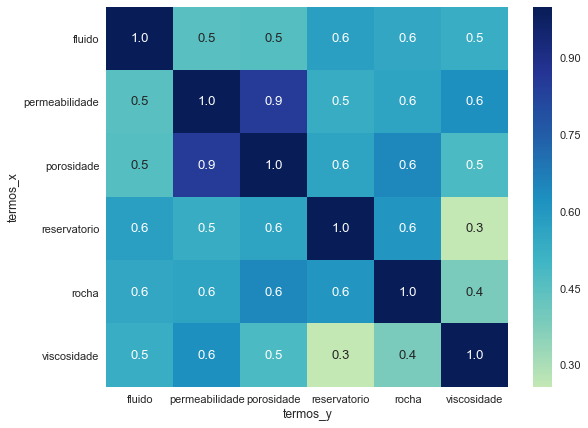

In [6]:
import seaborn as sns
sns.set(rc={'figure.figsize':(9,7)})
sns.set(font_scale = 1.1)

df = terms_df.pivot_table(index='termos_x', columns='termos_y', values='valores')
sns.heatmap(df, annot=True, fmt=".1f", cmap="YlGnBu", center=0.5)

In [3]:
arquivoUSP = os.path.join("modelos", 'word2vec-NILC-D100.txt')
word2vecUSP = gensim.models.KeyedVectors.load_word2vec_format(
            arquivoUSP,
            binary=False,
            unicode_errors='ignore')


In [4]:
print(len(word2vecUSP.wv.vocab))
word2vecUSP.similarity('reservatório', 'reservatório')

934966


0.9999999999999998

In [9]:
termos = ['reservatório', 'porosidade', 'permeabilidade', 'rocha', 'fluido', 'viscosidade']
termos_x = termos*len(termos)
termos_y = []
for x in termos:
    for i in range(len(termos)):
        termos_y.append(x)
    

valores = []
for i in range(len(termos_x)):
    valores.append( word2vecUSP.similarity(termos_x[i],termos_y[i]) )

NameError: name 'word2vecUSP' is not defined

In [10]:
dataset = {'termos_x': termos_x,
           'termos_y': termos_y,
           'valores': valores}

terms_df = pd.DataFrame(dataset)
terms_df

ValueError: arrays must all be same length

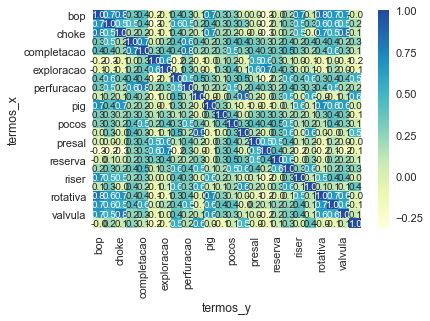

In [8]:
import seaborn as sns
%matplotlib inline
df = terms_df.pivot_table(index='termos_x', columns='termos_y', values='valores')
sns.heatmap(df, annot=True, fmt=".1f", cmap="YlGnBu", center=0.5)

In [168]:
word2vec.most_similar('choke')

C:\Users\diogo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('succao', 0.840244710445404),
 ('bypass', 0.8333839178085327),
 ('valvula', 0.7852400541305542),
 ('bop', 0.7771759033203125),
 ('vent', 0.7699935436248779),
 ('dreno', 0.7672243118286133),
 ('pressurizado', 0.7447757124900818),
 ('valve', 0.7443245053291321),
 ('desarenador', 0.7426056861877441),
 ('camisa', 0.7425185441970825)]

In [ ]:
# Elevação e Escoamento

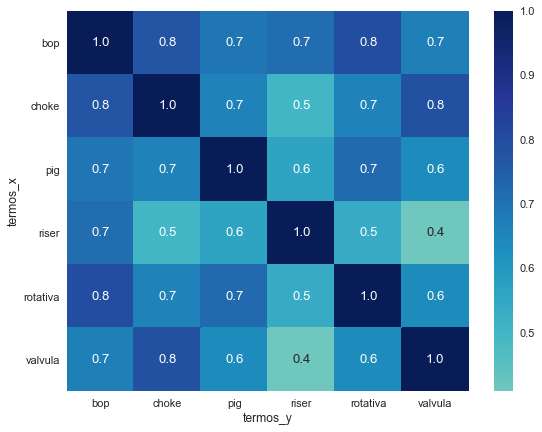

In [18]:
termos = ['riser', 'choke', 'rotativa', 'pig', 'valvula', 'bop']
termos_x = termos*len(termos)
termos_y = []
for x in termos:
    for i in range(len(termos)):
        termos_y.append(x)
    

valores = []
for i in range(len(termos_x)):
    valores.append( word2vec.wv.similarity(termos_x[i],termos_y[i]) )
    
dataset = {'termos_x': termos_x,
           'termos_y': termos_y,
           'valores': valores}

terms_df = pd.DataFrame(dataset)
df = terms_df.pivot_table(index='termos_x', columns='termos_y', values='valores')
sns.heatmap(df, annot=True, fmt=".1f", cmap="YlGnBu", center=0.5)

plt.yticks(rotation=0) 
plt.show()

C:\Users\diogo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


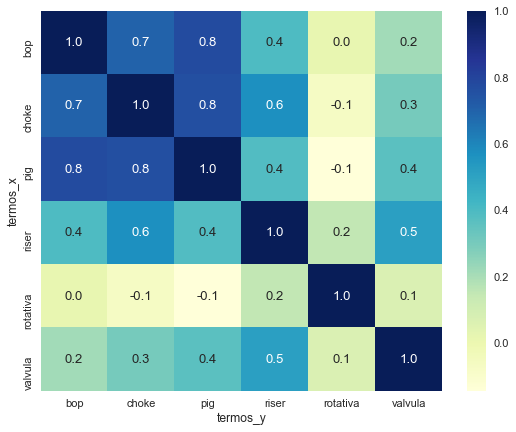

In [176]:
valores = []
for i in range(len(termos_x)):
    valores.append( word2vecUSP.wv.similarity(termos_x[i],termos_y[i]) )
    
dataset = {'termos_x': termos_x,
           'termos_y': termos_y,
           'valores': valores}

terms_df = pd.DataFrame(dataset)
df = terms_df.pivot_table(index='termos_x', columns='termos_y', values='valores')
sns.heatmap(df, annot=True, fmt=".1f", cmap="YlGnBu", )

In [ ]:
# EP

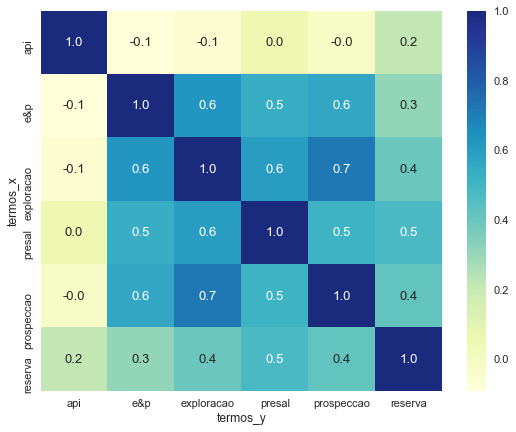

In [16]:
termos = ['exploracao', 'presal', 'e&p', 'reserva', 'api', 'prospeccao']
termos_x = termos*len(termos)
termos_y = []
for x in termos:
    for i in range(len(termos)):
        termos_y.append(x)
    

valores = []
for i in range(len(termos_x)):
    valores.append( word2vec.wv.similarity(termos_x[i],termos_y[i]) )
    
dataset = {'termos_x': termos_x,
           'termos_y': termos_y,
           'valores': valores}

terms_df = pd.DataFrame(dataset)
df = terms_df.pivot_table(index='termos_x', columns='termos_y', values='valores')
sns.heatmap(df, annot=True, fmt=".1f", cmap="YlGnBu", center=0.5)

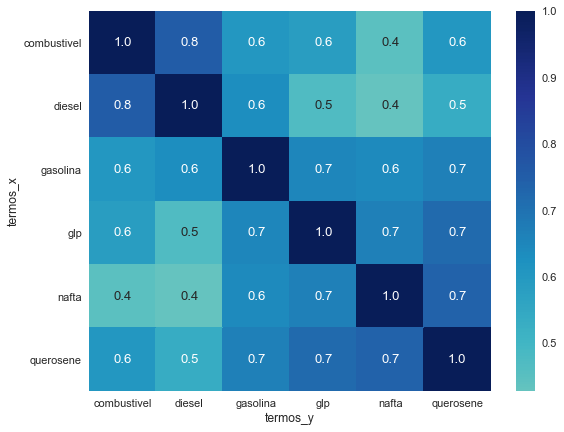

In [19]:
termos = ['gasolina', 'diesel', 'querosene', 'nafta', 'glp', 'combustivel']
termos_x = termos*len(termos)
termos_y = []
for x in termos:
    for i in range(len(termos)):
        termos_y.append(x)
    

valores = []
for i in range(len(termos_x)):
    valores.append( word2vec.wv.similarity(termos_x[i],termos_y[i]) )
    
dataset = {'termos_x': termos_x,
           'termos_y': termos_y,
           'valores': valores}

terms_df = pd.DataFrame(dataset)
df = terms_df.pivot_table(index='termos_x', columns='termos_y', values='valores')
sns.heatmap(df, annot=True, fmt=".1f", cmap="YlGnBu", center=0.5)
plt.yticks(rotation=0) 
plt.show()

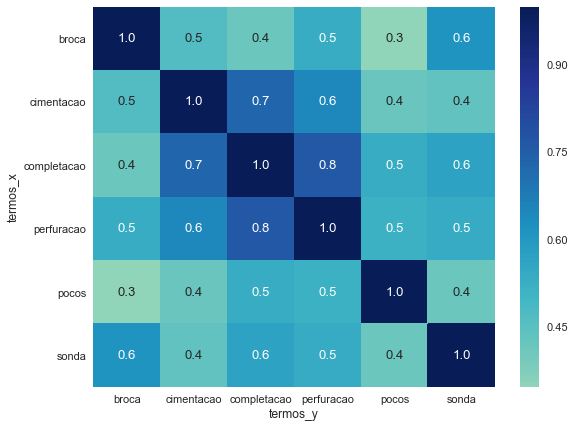

In [21]:
termos = ['broca', 'perfuracao', 'sonda', 'pocos', 'completacao', 'cimentacao']
termos_x = termos*len(termos)
termos_y = []
for x in termos:
    for i in range(len(termos)):
        termos_y.append(x)
    

valores = []
for i in range(len(termos_x)):
    valores.append( word2vec.wv.similarity(termos_x[i],termos_y[i]) )
    
dataset = {'termos_x': termos_x,
           'termos_y': termos_y,
           'valores': valores}

terms_df = pd.DataFrame(dataset)
df = terms_df.pivot_table(index='termos_x', columns='termos_y', values='valores')
sns.heatmap(df, annot=True, fmt=".1f", cmap="YlGnBu", center=0.5)
plt.yticks(rotation=0) 
plt.show()

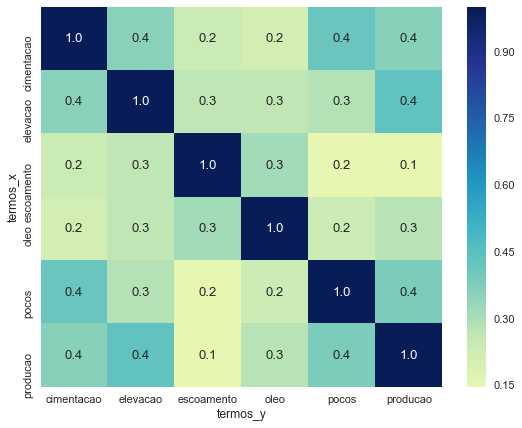

In [34]:
termos = ['producao', 'elevacao', 'escoamento', 'oleo', 'pocos', 'cimentacao']
termos_x = termos*len(termos)
termos_y = []
for x in termos:
    for i in range(len(termos)):
        termos_y.append(x)
    

valores = []
for i in range(len(termos_x)):
    valores.append( word2vec.wv.similarity(termos_x[i],termos_y[i]) )
    
dataset = {'termos_x': termos_x,
           'termos_y': termos_y,
           'valores': valores}

terms_df = pd.DataFrame(dataset)
df = terms_df.pivot_table(index='termos_x', columns='termos_y', values='valores')
sns.heatmap(df, annot=True, fmt=".1f", cmap="YlGnBu", center=0.5)

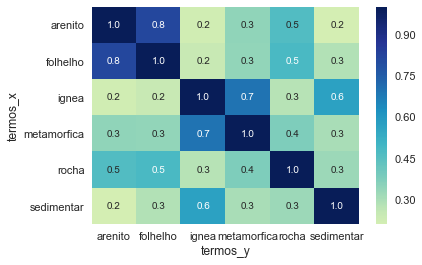

In [8]:
termos = ['rocha', 'ignea', 'sedimentar', 'metamorfica', 'arenito', 'folhelho']
termos_x = termos*len(termos)
termos_y = []
for x in termos:
    for i in range(len(termos)):
        termos_y.append(x)
    

valores = []
for i in range(len(termos_x)):
    valores.append( word2vec.wv.similarity(termos_x[i],termos_y[i]) )
    
dataset = {'termos_x': termos_x,
           'termos_y': termos_y,
           'valores': valores}

terms_df = pd.DataFrame(dataset)
df = terms_df.pivot_table(index='termos_x', columns='termos_y', values='valores')
sns.heatmap(df, annot=True, fmt=".1f", cmap="YlGnBu", center=0.5)

In [ ]:
# varios termos

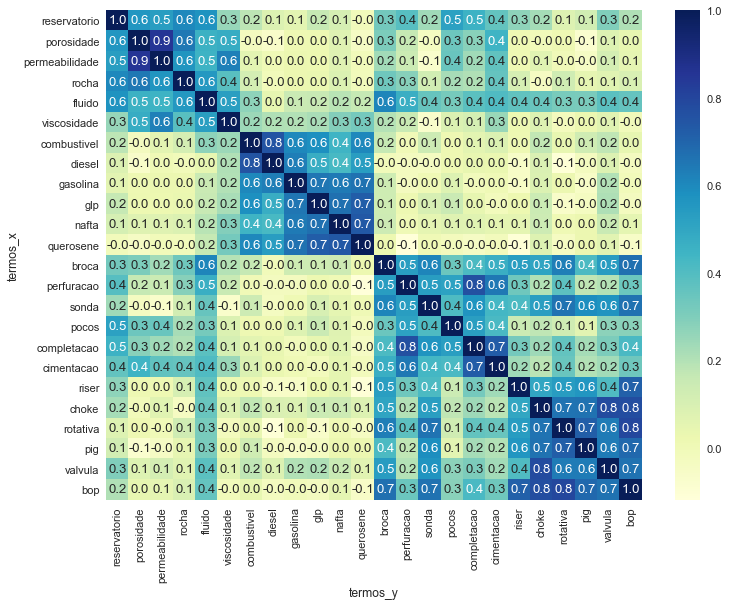

In [12]:
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(12,9)})
sns.set(font_scale = 1.1)

termos = ['reservatorio', 'porosidade', 'permeabilidade', 'rocha', 'fluido', 'viscosidade',
          'combustivel', 'diesel', 'gasolina', 'glp', 'nafta', 'querosene',
          'broca', 'perfuracao', 'sonda', 'pocos', 'completacao', 'cimentacao',
          'riser', 'choke', 'rotativa', 'pig', 'valvula', 'bop']
termos_x = termos*len(termos)
termos_y = []
for x in termos:
    for i in range(len(termos)):
        termos_y.append(x)
    

valores = []
for i in range(len(termos_x)):
    valores.append( word2vec.wv.similarity(termos_x[i],termos_y[i]) )
    
dataset = {'termos_x': termos_x,
           'termos_y': termos_y,
           'valores': valores}

terms_df = pd.DataFrame(dataset)
df = terms_df.pivot_table(index='termos_x', columns='termos_y', values='valores')
df = df.reindex(index=termos, columns=termos)
sns.heatmap(df, annot=True, fmt=".1f", cmap="YlGnBu", )

In [ ]:
termos = ['reservatorio', 'porosidade', 'permeabilidade', 'rocha', 'fluido', 'viscosidade',
          'riser', 'choke', 'rotativa', 'pig', 'valvula', 'bop']
termos_x = termos*len(termos)
termos_y = []
for x in termos:
    for i in range(len(termos)):
        termos_y.append(x)
    

valores = []
for i in range(len(termos_x)):
    valores.append( word2vec.wv.similarity(termos_x[i],termos_y[i]) )
    
dataset = {'termos_x': termos_x,
           'termos_y': termos_y,
           'valores': valores}

terms_df = pd.DataFrame(dataset)
df = terms_df.pivot_table(index='termos_x', columns='termos_y', values='valores')
sns.heatmap(df, annot=True, fmt=".1f", cmap="YlGnBu", center=0.5)

plt.yticks(rotation=0) 
plt.show()